# **Value of Pi**

In [1]:
import random
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
r = 1.0 # radius
N = 5001 # number of iteration (Trials)
d = {"Trials" : [], "Pi" : []}

$Distance(P, center) = \sqrt{(x-0)^2+(y-0)^2}$
$=\sqrt{x^2+y^2}$

In [3]:
for T in range(1,N):
  circle_p = 0
  for i in range(T):
    x = random.uniform(-1.0, 1.0) # Uniform : Every event occur evenly
    y = random.uniform(-1.0, 1.0)

    x2 = x ** 2
    y2 = y ** 2

    if math.sqrt(x2 + y2) <= 1.0:
      circle_p += 1

  pi = 4 * circle_p / T
  d["Trials"].append(T)
  d["Pi"].append(pi)

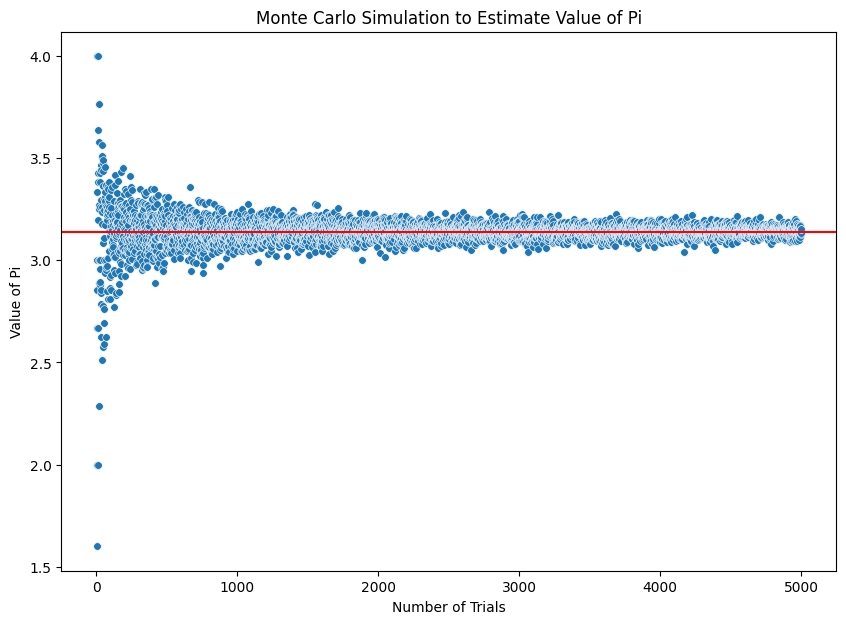

In [4]:
df = pd.DataFrame(data=d)
plt.figure(figsize = (10,7))
plot = sns.scatterplot(x="Trials", y="Pi", s=30, marker="o", data=df)
plot.set(title='Monte Carlo Simulation to Estimate Value of Pi', xlabel="Number of Trials", ylabel="Value of Pi")
plt.axhline(y=3.14, color='r', linestyle='-')
plt.show()

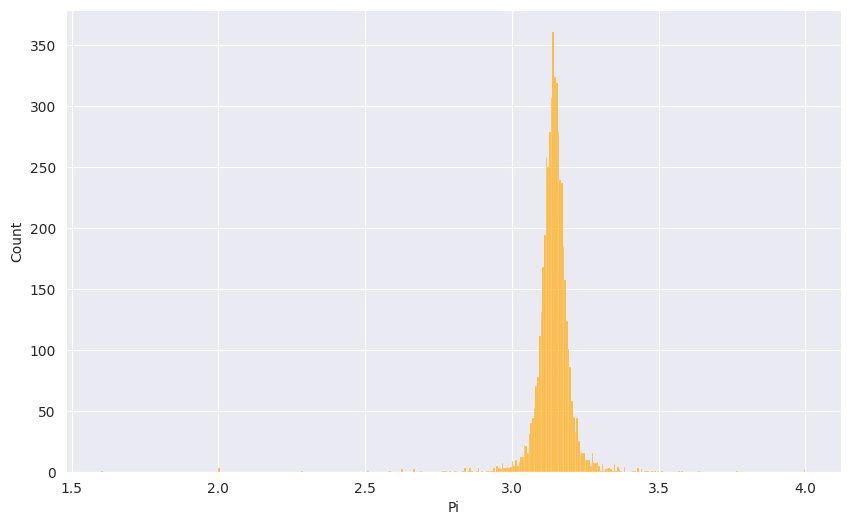

In [5]:
import seaborn as sns
sns.set_style('darkgrid')
fig = plt.figure(figsize = (10,6))
sns.histplot(df, x="Pi",color='orange');

In [7]:
df['Pi'].mean()
# 3.1415926535897932384

np.float64(3.1418772587895734)

# **Predicting Sales Commission Budget**

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')

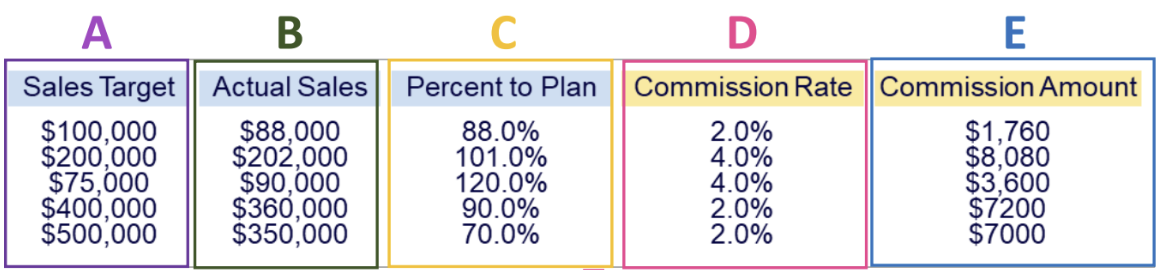

**Random Percent to Plan (normal distribution)**



In [58]:
avg = 1 # Average percent to plan
std_dev = .1 # Standard Deviation
num_reps = 500 # Number of Repetitions
pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2) # Normal Distribution : From average from 1 with a normal distribution of 0.1, 500 times
pct_to_target

array([0.99, 0.99, 0.87, 0.9 , 1.1 , 0.81, 1.09, 0.99, 0.93, 1.05, 1.08,
       0.98, 0.87, 1.07, 0.91, 1.02, 0.86, 1.11, 1.07, 0.96, 0.84, 1.04,
       1.01, 1.06, 0.94, 0.87, 1.33, 1.06, 0.82, 0.99, 1.06, 0.84, 0.99,
       1.  , 1.09, 0.97, 1.09, 0.84, 0.85, 1.06, 1.11, 0.97, 1.  , 0.93,
       0.96, 0.85, 0.98, 0.97, 1.  , 0.9 , 0.98, 0.93, 0.98, 1.04, 0.88,
       1.07, 0.84, 1.02, 0.94, 0.99, 1.07, 0.9 , 1.01, 1.07, 0.95, 1.05,
       1.  , 0.78, 0.94, 1.06, 0.91, 1.02, 0.97, 0.87, 0.92, 1.18, 0.98,
       0.9 , 1.09, 1.15, 0.96, 1.15, 1.27, 0.86, 1.06, 0.92, 0.94, 1.05,
       0.97, 1.  , 1.06, 0.95, 1.05, 0.86, 0.91, 0.96, 1.02, 0.98, 1.05,
       0.95, 1.07, 1.11, 0.92, 0.9 , 0.92, 0.98, 1.04, 1.03, 0.96, 1.04,
       1.03, 1.08, 1.17, 1.22, 1.1 , 1.15, 1.1 , 1.06, 1.06, 1.22, 1.03,
       0.89, 0.95, 1.12, 1.05, 0.96, 0.92, 1.06, 0.85, 1.08, 0.93, 0.91,
       1.09, 0.94, 0.98, 1.13, 0.96, 1.07, 0.87, 0.91, 1.05, 0.99, 1.07,
       0.97, 0.88, 1.05, 0.88, 0.88, 1.01, 1.1 , 0.

**Random Sales Target (weighted uniform distribution)**

In [59]:
sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)

**Create DataFrame**

In [60]:
df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,'Sales_Target': sales_target})

**Compute Actual Sales**

In [61]:
df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']
df

,Pct_To_Target,Sales_Target,Sales
0,0.99,200000,198000.0
1,0.99,75000,74250.0
2,0.87,300000,261000.0
3,0.90,75000,67500.0
4,1.10,200000,220000.0
...,...,...,...
495,0.99,75000,74250.0
496,1.18,400000,472000.0
497,1.04,100000,104000.0
498,0.86,200000,172000.0


**Visualize the distribution of Percent to Plan (Pct_To_Target)**

<Axes: title={'center': 'Percent to Target Distribution'}, ylabel='Frequency'>

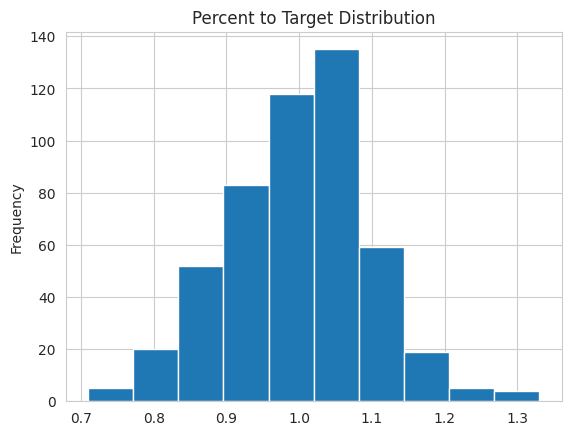

In [62]:
df['Pct_To_Target'].plot(kind='hist', title='Percent to Target Distribution')

**Visualize the distribution of Sales Target**

<Axes: xlabel='Sales_Target', ylabel='count'>

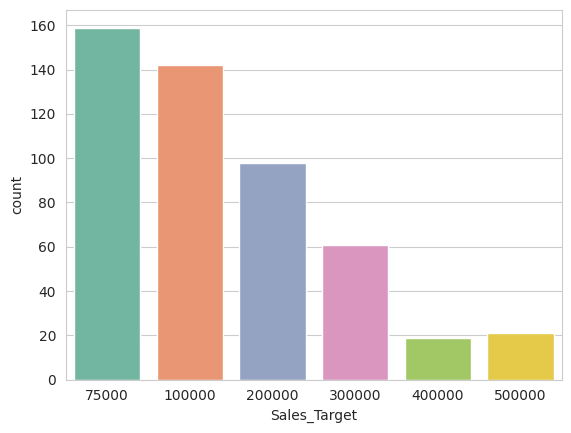

In [63]:
sns.countplot(x = 'Sales_Target', data = df, hue='Sales_Target',palette='Set2',legend=False)

**Calculate Commission Rate**

In [64]:
def calc_commission_rate(x):
  if x <= .90:
    return .02
  if x <= .99:
    return.03
  else:
    return .04

In [65]:
df['Commsion_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)

In [66]:
df['Commsion_Amount'] = df['Commsion_Rate'] * df['Sales']
df.head()

,Pct_To_Target,Sales_Target,Sales,Commsion_Rate,Commsion_Amount
0,0.99,200000,198000.0,0.03,5940.0
1,0.99,75000,74250.0,0.03,2227.5
2,0.87,300000,261000.0,0.02,5220.0
3,0.90,75000,67500.0,0.02,1350.0
4,1.10,200000,220000.0,0.04,8800.0


In [71]:
num_simulations = 5000
all_stats = []
# Loop through many simulations
for i in range(num_simulations):
  # Choose random inputs for the sales targets and percent to target
  sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
  pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)
  # Build the dataframe based on the inputs and number of reps
  df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
  'Sales_Target': sales_target})

  # Back into the sales number using the percent to target rate
  df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']
  # Determine the commissions rate and calculate it
  df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
  df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']
  # We want to track sales,commission amounts and sales targets over all the simulations
  all_stats.append([df['Sales'].sum().round(0),df['Commission_Amount'].sum().round(0),df['Sales_Target'].sum().round(0)])

In [72]:
results_df = pd.DataFrame.from_records(all_stats, columns=['Sales','Commission_Amount','Sales_Target'])

In [73]:
results_df.describe().style.format('{:,.2f}')

,Sales,Commission_Amount,Sales_Target
count,"5,000.00","5,000.00","5,000.00"
mean,"83,724,784.00","2,859,415.53","83,711,880.00"
std,"2,666,254.91","100,110.69","2,644,777.80"
min,"75,018,000.00","2,534,018.00","75,025,000.00"
25%,"81,880,625.00","2,791,340.00","81,900,000.00"
50%,"83,673,875.00","2,858,438.50","83,675,000.00"
75%,"85,537,500.00","2,926,289.75","85,450,000.00"
max,"94,259,750.00","3,311,645.00","93,425,000.00"


<Axes: title={'center': 'Total Commission Amount'}, ylabel='Frequency'>

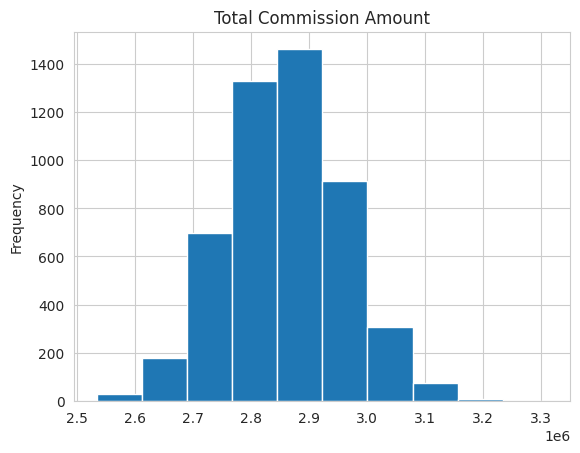

In [74]:
results_df['Commission_Amount'].plot(kind='hist', title="Total Commission Amount")